In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel

In [3]:
df = pd.read_csv('data/train.csv')

In [4]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


* Lots of text fields that will need to be encoded (maybe try catboost)
* Lots of missing values, especially in categoricals
* Some in numerical values that I should try to impute
* Medium number of features and not that much data (should try some simple models)
* May want to bucket some of the numerical features like year built'
* MSSubClass is actually a categorical


In [6]:
df.MSSubClass = df.MSSubClass.astype(str)
df = pd.get_dummies(df)

In [7]:
from sklearn.model_selection import train_test_split
X = df.drop(['SalePrice', 'Id'], axis=1).values
y = df.SalePrice.values
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size=0.2)

In [8]:
df.describe().transpose().loc[lambda x: x['count'] != 1460]

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1201.0,70.049958,24.284752,21.0,59.0,69.0,80.0,313.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.0,0.0,166.0,1600.0
GarageYrBlt,1379.0,1978.506164,24.689725,1900.0,1961.0,1980.0,2002.0,2010.0


* After getting dummy variables there are 304 features which is likely too many for OLS
* Will need to use some kind of feature selection or regularization
* Still a few missing values to impute
* Try a simple pipeline with regression, random forest, gboosting

## First Pass

In [9]:
pipe = Pipeline([
    ('impute', SimpleImputer(strategy="median")),
    ('scaler', MinMaxScaler()),
    ('regressor', Ridge())
])

param_grid = [{'scaler': [MinMaxScaler(), None],
               'regressor': [RandomForestRegressor(n_estimators=100)],
               'regressor__min_samples_split': [5, 10],
               'regressor__max_features': ['sqrt', 'log2', 0.3],
              },
              {'scaler': [MinMaxScaler(), None],
               'regressor': [GradientBoostingRegressor()],
               'regressor__max_depth': [2, 3, 4, 5, 6],
               'regressor__max_features': ['sqrt', 'log2', 0.3],
              },
              {'scaler': [MinMaxScaler(), None],
               'regressor': [Ridge()],
               'regressor__alpha': [0.1, 1, 10]}
             ]

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_log_error', return_train_score=False)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('impute', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)), ('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('regressor', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'scaler': [MinMaxScaler(copy=True, feature_range=(0, 1)), None], 'regressor': [RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.3, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_l...  normalize=False, random_state=None, solver='auto', tol=0.001)], 'regressor__alpha': [0.1, 1, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='neg_mean_squared_log_error', ve

In [10]:
res = pd.DataFrame(grid.cv_results_)
res['rmsle'] = np.sqrt(-res.mean_test_score)
res.loc[:, ['param_regressor', 'param_regressor__max_features', 'param_regressor__max_depth',
            'param_scaler', 'rank_test_score', 'rmsle']].sort_values('rank_test_score')

,param_regressor,param_regressor__max_features,param_regressor__max_depth,param_scaler,rank_test_score,rmsle
29,([DecisionTreeRegressor(criterion='friedman_ms...,0.3,4,None,1,0.130453
25,([DecisionTreeRegressor(criterion='friedman_ms...,sqrt,4,None,2,0.130814
28,([DecisionTreeRegressor(criterion='friedman_ms...,0.3,4,"MinMaxScaler(copy=True, feature_range=(0, 1))",3,0.131091
34,([DecisionTreeRegressor(criterion='friedman_ms...,0.3,5,"MinMaxScaler(copy=True, feature_range=(0, 1))",4,0.132561
23,([DecisionTreeRegressor(criterion='friedman_ms...,0.3,3,None,5,0.132754
22,([DecisionTreeRegressor(criterion='friedman_ms...,0.3,3,"MinMaxScaler(copy=True, feature_range=(0, 1))",6,0.132810
36,([DecisionTreeRegressor(criterion='friedman_ms...,sqrt,6,"MinMaxScaler(copy=True, feature_range=(0, 1))",7,0.133331
30,([DecisionTreeRegressor(criterion='friedman_ms...,sqrt,5,"MinMaxScaler(copy=True, feature_range=(0, 1))",8,0.133366
41,([DecisionTreeRegressor(criterion='friedman_ms...,0.3,6,None,9,0.133631
46,"Ridge(alpha=10, copy_X=True, fit_intercept=Tru...",NaN,NaN,"MinMaxScaler(copy=True, feature_range=(0, 1))",10,0.134229


In [11]:
grid.best_params_

{'regressor': GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='ls', max_depth=4, max_features=0.3,
              max_leaf_nodes=None, min_impurity_decrease=0.0,
              min_impurity_split=None, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, n_iter_no_change=None, presort='auto',
              random_state=None, subsample=1.0, tol=0.0001,
              validation_fraction=0.1, verbose=0, warm_start=False),
 'regressor__max_depth': 4,
 'regressor__max_features': 0.3,
 'scaler': None}

* Ridge regression is able to do alright despite the lack of feature engineering
* Gradient Boosting does well should try others like xgboost and catboost
* Should probably look at the data to reduce the feature space.
* Should also look at residuals to seem if fit is reasonable

In [12]:
pd.Series(grid.best_estimator_.named_steps.regressor.feature_importances_,
          index=df.drop(['SalePrice', 'Id'], axis=1).columns.values).sort_values()[::-1]


OverallQual             0.309910
GrLivArea               0.141641
GarageCars              0.138257
TotalBsmtSF             0.043114
1stFlrSF                0.029702
ExterQual_TA            0.027180
YearBuilt               0.026722
BsmtFinSF1              0.025691
ExterQual_Gd            0.022554
Fireplaces              0.021132
LotArea                 0.016987
GarageYrBlt             0.016732
BsmtQual_Ex             0.016508
YearRemodAdd            0.015471
GarageArea              0.014414
2ndFlrSF                0.013787
FullBath                0.011006
OverallCond             0.007360
Exterior2nd_HdBoard     0.006726
KitchenQual_TA          0.004432
TotRmsAbvGrd            0.004384
BsmtUnfSF               0.004352
WoodDeckSF              0.004260
LotFrontage             0.003811
BsmtFinType1_GLQ        0.003380
CentralAir_Y            0.003356
MSSubClass_60           0.002870
MasVnrArea              0.002533
BsmtFullBath            0.002497
OpenPorchSF             0.002486
          

In [13]:
np.sqrt(-grid.score(X_val, y_val))

0.1272846828460598

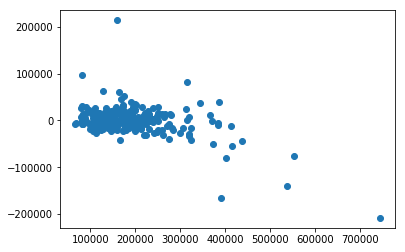

In [14]:
plt.scatter(y_val, grid.predict(X_val) - y_val)

[]

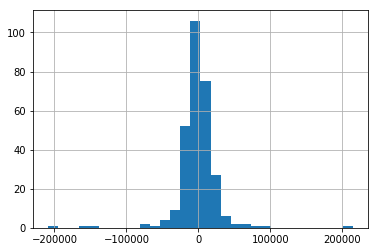

In [15]:
pd.Series(grid.predict(X_val) - y_val).hist(bins=30).plot()

((array([-2.82405984, -2.5268341 , -2.35847189, -2.23845937, -2.14401259,
         -2.06553252, -1.99803001, -1.9385663 , -1.88525859, -1.83682524,
         -1.79235285, -1.75116654, -1.712753  , -1.6767123 , -1.64272657,
         -1.6105388 , -1.57993808, -1.55074915, -1.52282467, -1.49603959,
         -1.47028677, -1.44547373, -1.42152004, -1.39835531, -1.37591755,
         -1.35415189, -1.33300949, -1.31244672, -1.29242438, -1.27290718,
         -1.25386317, -1.23526335, -1.21708133, -1.199293  , -1.18187626,
         -1.16481085, -1.14807809, -1.13166074, -1.11554287, -1.09970971,
         -1.08414754, -1.0688436 , -1.05378598, -1.03896357, -1.02436598,
         -1.00998348, -0.99580691, -0.98182771, -0.96803779, -0.95442953,
         -0.94099577, -0.92772971, -0.91462495, -0.90167541, -0.88887533,
         -0.87621926, -0.86370201, -0.85131863, -0.83906446, -0.826935  ,
         -0.814926  , -0.8030334 , -0.7912533 , -0.77958199, -0.76801592,
         -0.7565517 , -0.74518605, -0.

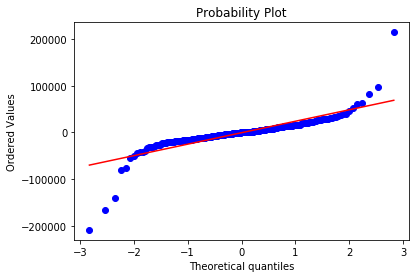

In [16]:
from scipy.stats import probplot
probplot(grid.predict(X_val) - y_val, plot=plt)

Residuals do not look normal. Pretty extreme values at either end.

## Second Pass

Only look at gradient boosting models without scaling. Use model based feature selection.

In [25]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

pipe = Pipeline([
    ('impute', SimpleImputer(strategy="median")),
    ('feature_selection', SelectFromModel(RandomForestRegressor(n_estimators=100))),
    ('regressor', GradientBoostingRegressor())
])

param_grid = { 'feature_selection': [SelectFromModel(RandomForestRegressor(n_estimators=100), threshold=0.0001),
                                     None],
               'regressor': [GradientBoostingRegressor(max_features=0.3),
                             XGBRegressor(),
                             CatBoostRegressor()],
               'regressor__max_depth': [4, 5, 6, 7, 8],
              }
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_log_error', return_train_score=False, n_jobs=-1)
grid.fit(X_train, y_train)

KeyboardInterrupt: 

In [24]:
grid.best_params_

{'feature_selection': None,
 'regressor': <catboost.core.CatBoostRegressor at 0x7fda7c172710>,
 'regressor__max_depth': 5}

In [21]:
res = pd.DataFrame(grid.cv_results_)
res['rmsle'] = np.sqrt(-res.mean_test_score)
res.loc[:, ['param_regressor', 'param_regressor__max_depth', 'param_feature_selection',
            'rank_test_score', 'rmsle']].sort_values('rank_test_score')

,param_regressor,param_regressor__max_depth,param_feature_selection,rank_test_score,rmsle
26,<catboost.core.CatBoostRegressor object at 0x7...,5,None,1,0.129675
27,<catboost.core.CatBoostRegressor object at 0x7...,6,None,2,0.129885
28,<catboost.core.CatBoostRegressor object at 0x7...,7,None,3,0.130490
15,"GradientBoostingRegressor(alpha=0.9, criterion...",4,None,4,0.130713
29,<catboost.core.CatBoostRegressor object at 0x7...,8,None,5,0.131792
11,<catboost.core.CatBoostRegressor object at 0x7...,5,SelectFromModel(estimator=RandomForestRegresso...,6,0.132582
16,"GradientBoostingRegressor(alpha=0.9, criterion...",5,None,7,0.132681
25,<catboost.core.CatBoostRegressor object at 0x7...,4,None,8,0.132855
20,"XGBRegressor(base_score=0.5, booster='gbtree',...",4,None,9,0.132904
5,"XGBRegressor(base_score=0.5, booster='gbtree',...",4,SelectFromModel(estimator=RandomForestRegresso...,10,0.133133


In [22]:
np.sqrt(-grid.score(X_val, y_val))

0.13669018005793035

* Cat boost seems to do well but might do even better if I hadn't one hot encoded the data.
* Feature selection seemed to help a little with a low threshold

## Prepare submission

In [42]:
test = pd.read_csv('data/test.csv')
test.MSSubClass = test.MSSubClass.astype(str)
test = pd.get_dummies(test)
X_test = test.drop('Id', axis=1).loc[:, df.drop(['SalePrice', 'Id'], axis=1).columns].values

pipe = Pipeline([
    ('impute', SimpleImputer(strategy="median")),
    ('regressor', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='ls', max_depth=4, max_features=0.3,
              max_leaf_nodes=None, min_impurity_decrease=0.0,
              min_impurity_split=None, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, n_iter_no_change=None, presort='auto',
              random_state=None, subsample=1.0, tol=0.0001,
              validation_fraction=0.1, verbose=0, warm_start=False))
])
pipe.fit(X,y)
y_pred = pipe.predict(X_test)

/home/will/kaggle/kaggle/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [55]:
pd.DataFrame({'SalePrice': y_pred}, index=pd.read_csv('data/test.csv').Id).to_csv('output/pred.csv')

In [47]:
y

array([208500, 181500, 223500, ..., 266500, 142125, 147500])